# Logistic Regression

In this assignment you will implement logistic regression model for classifying cat vs non-cat images. First, let's import required packages.

In [1]:
import numpy as np
import h5py # for processing files stored in h5 format
import seaborn
import matplotlib # for plotting
from matplotlib import pyplot as plt # for plotting
from PIL import Image # for image processing

%matplotlib inline 

Data consists of a set of cat and non-cat images along with the corresponding labels. Test labels can be used for quantifying the performance of the model. The train and test data are stored in h5 format. So we will use file reader from h5py package and convert the data to numy array. 

In [2]:
def load_train_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) # train images
    train_y = np.array(train_dataset["train_set_y"][:]) # train labels
    return train_x, train_y
    
def load_test_data():
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) # test images
    test_y = np.array(test_dataset["test_set_y"][:]) # test labels
    return test_x, test_y

train_x, train_y = load_train_data()
test_x, test_y = load_test_data()

Lets print the size of the data.

In [3]:
print(f'train data size: train_x {train_x.shape}, train_y {train_y.shape}')
print(f'test data size: test_x {test_x.shape}, test_y {test_y.shape}')


train data size: train_x (209, 64, 64, 3), train_y (209,)
test data size: test_x (50, 64, 64, 3), test_y (50,)


So, there are 209 training images with labels and 50 test images. Each image is a color image of size 64 x 64. Now lets plot a few training images picked randomly along with its labels.

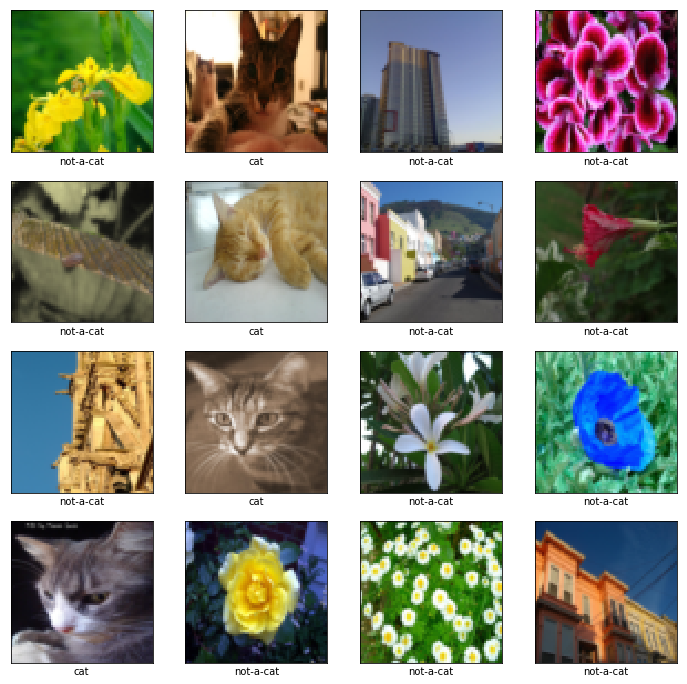

In [4]:
class_to_name = {1:'cat', 0:'not-a-cat'}
fig = plt.figure(figsize = (12, 12))
rows, columns = 4, 4

for i in range(1, rows*columns+1):
    axes = fig.add_subplot(rows, columns, i)
    image_index = np.random.randint(train_x.shape[0])
    plt.imshow(train_x[image_index])
    axes.set_xticks([])
    axes.set_yticks([])
    plt.xlabel(class_to_name[train_y[image_index]])
    

Currently each training is 64 x 64 x 3 i.e train_x has shape (m, 64, 64, 3) where m is number of training samples. We need the train_x to have shape nx x m where nx is the number of input features ie 64x64x3 = 12288. You are required to complete the function flatten below that will take a m x h x w x c numpy array, flatten it to (h*w*c) x m numpy array and return it. Hint: numpy.reshape method

In [5]:
def flatten(z):
    m, h, w, c = z.shape
    nx = h*w*c
    ###Fill your code below. ###    
    return z.reshape((m, nx)).T

In [6]:
# you can test your function by uncommenting the following line.
print(flatten(train_x).shape) 
print(test_y.shape)
np.sum(train_y)

(12288, 209)
(50,)


72

Now that data is ready, you will implement logistic regression. You may look at the python style pseudo-code in lecture notes for clarity. The code below will mostly follow that pseudo-code. You have to complete forward, backward and sigmoid functions below. Further you have to complete few lines in the train loop in main function that trains the model.

In [7]:
def forward(a, w, b):
    """
      Forward propagates a through the logistic unit given w and b
      a: I/p to logistic unit of shape nx x m
      w: weight vector of shape nx x 1
      b: bias which is a scalar
      
      returns anew: the output from logistic unit of shape 1 x m
              cache: a tuple that contains input a
    """
    
    # fill rhs of following 3 lines. no extra lines of code required.
    z = np.matmul(w.T, a) + b                # linear computation; np.dot or np.matmul or the operator @ will be helpful
                                             # learn about numpy broadcasting; it will be helpful for adding b to dot product of w and a
        
    anew = sigmoid(z)                        # non-linear activation on z
    cache = (a, )                            # a tuple that contains input a
    return anew, cache

def backward(da, a, cache):
    """
      Backward propagates da through the logistic unit given a and cache
      da: derivative of loss with respect to logistic output; shape is 1 x m
      a: o/p to logistic unit of shape 1 x m
      cache: a tuple that contains input to logistic unit; i/p to logistic unit is of shape nx x m
      
      returns dw: derivative of loss with respect to w; shape is nx x 1
              db: derivative of loss with respect to b; db is a scalar
    """
    
    # fill rhs of following 4 lines. no extra lines of code required.
    aprev = cache[0]                    # extract from cache the i/p to logistic unit
    dz = da * a * (1-a)     # compute dz using chain rule as product of incoming grad da and local grad 
    dw = np.sum(dz * aprev, axis=1, keepdims=True)                       # compute dw; np.sum will be helpful  
    db = np.sum(dz, axis=1)                       # compute db; np.sum will be helpful   
    return dw, db

def sigmoid(z):
    """
      Computes sigmoid of the given np array z
      z: np array of any shape
      
      returns sigmoid of z
    """
    # replace ...... below by correct return value; np.exp will be helpful
    return (1 / (1 + np.exp(-z)))

# def main(): # main function to train the model
def train(lr=0.001, iters=500, eps=1e-6, init_wts_zeros = False, seeding = False, seed = 10):
    # load train data
    if seeding:
        np.random.seed(seed)
    a0, y = load_train_data()
    a0 = flatten(a0)
    a0 = a0/255. # normalize the data to [0, 1]
    nx, m = a0.shape    
    
    # set some hyperparameters and epsilon
#     alpha = 0.01    
#     miter = 500
#     epsilon = 1e-6
    alpha = lr
    miter = iters
    epsilon = eps
    
    #intialize weight and bias parameters
#     np.random.seed(9)
    if not init_wts_zeros:
        w = np.random.randn(nx, 1)*.01
    else:
        w = np.zeros((nx, 1),dtype=np.float32)
        
    b = 0
    
    # var for storing loss
    losses = []
    wts = []
    # train loop
    # fill rhs in the body of the for loop
    for i in range(miter):
        wts.append(w.copy())
#         print("\n\n\n\n\nIter: ", i)
#         [print("\n\nsai: ", wts[j]) for j in range(i+1)]
        a1, cache = forward(a0, w, b)            # forward propagation        
        L = (-1/m) * np.sum(y * np.log(a1) + (1-y) * np.log(1-a1))                    # compute loss; np.sum or np.mean, np.log will be useful
        da1 = (1/m) * (a1 - y) * (1 / ((a1 * (1-a1)) + epsilon))                  # derivative of loss with respect to a1
        dw, db = backward(da1, a1, cache)               # backward propagation
        w -= alpha * dw                   # update w
#         print('\n\ndw: ', dw)
        b -= alpha * db                   # update b
        if not i%100: # print loss every 100 iterations
            print(f'Loss at iteration {i}:\t{np.asscalar(L):.4f}')
        losses.append(np.asscalar(L))
#     [print("\n\nsai: ",wts[i]) for i in range(miter)]
    return w, b, losses, wts

# if __name__ == '__main__':
#     w, b, losses = main()    

Now we will test our model on both train and test data.

In [8]:
w, b, losses, wts = train(lr = 0.01, iters = 500)

Loss at iteration 0:	0.6564
Loss at iteration 100:	0.4263
Loss at iteration 200:	1.0119
Loss at iteration 300:	0.6304
Loss at iteration 400:	0.5235


In [9]:
def predict(x, w, b):
    a = sigmoid( w.T @ x + b)
    predictions = np.zeros_like(a)
    predictions[a > 0.5] = 1
    return predictions

def test_model(x, y, w, b):
    predictions = predict(x, w, b)
    acc = np.mean(predictions == y)
    acc = np.asscalar(acc)
    return acc

In [10]:
x, y = load_train_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'train accuracy: {test_model(x, y, w, b) * 100:.2f}%')

x, y = load_test_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'test accuracy: {test_model(x, y, w, b) * 100:.2f}%')

train accuracy: 83.73%
test accuracy: 80.00%


# Questions
### 1. Can you bring down the loss more? (Hint: Try more iterations. If loss oscillates, try different learning rates)

In [11]:
w, b, losses, wts = train(lr = 0.0025, iters = 5000, seeding = True)  # Default seed = 9

Loss at iteration 0:	0.7326
Loss at iteration 100:	0.5453
Loss at iteration 200:	0.4906
Loss at iteration 300:	0.4511
Loss at iteration 400:	0.4196
Loss at iteration 500:	0.3935
Loss at iteration 600:	0.3712
Loss at iteration 700:	0.3518
Loss at iteration 800:	0.3346
Loss at iteration 900:	0.3193
Loss at iteration 1000:	0.3054
Loss at iteration 1100:	0.2929
Loss at iteration 1200:	0.2814
Loss at iteration 1300:	0.2708
Loss at iteration 1400:	0.2611
Loss at iteration 1500:	0.2520
Loss at iteration 1600:	0.2436
Loss at iteration 1700:	0.2358
Loss at iteration 1800:	0.2285
Loss at iteration 1900:	0.2216
Loss at iteration 2000:	0.2151
Loss at iteration 2100:	0.2090
Loss at iteration 2200:	0.2032
Loss at iteration 2300:	0.1977
Loss at iteration 2400:	0.1926
Loss at iteration 2500:	0.1877
Loss at iteration 2600:	0.1830
Loss at iteration 2700:	0.1785
Loss at iteration 2800:	0.1743
Loss at iteration 2900:	0.1702
Loss at iteration 3000:	0.1664
Loss at iteration 3100:	0.1627
Loss at iteration 32

In [12]:
x, y = load_train_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'train accuracy: {test_model(x, y, w, b) * 100:.2f}%')

x, y = load_test_data()
x = flatten(x)
x = x/255. # normalize the data to [0, 1]
print(f'test accuracy: {test_model(x, y, w, b) * 100:.2f}%')

train accuracy: 99.52%
test accuracy: 68.00%


Note: We tried more iterations and then we reduced the learning rate. We finally settled at the above used values.

### 2. Write a simple python code to plot loss against number of iterations for learning rate alpha = 0.005. State your observations from the plot.

Loss at iteration 0:	0.6768
Loss at iteration 100:	0.5856
Loss at iteration 200:	0.4664
Loss at iteration 300:	0.3751
Loss at iteration 400:	0.3313
Loss at iteration 500:	0.3032
Loss at iteration 600:	0.2799
Loss at iteration 700:	0.2601
Loss at iteration 800:	0.2430
Loss at iteration 900:	0.2281


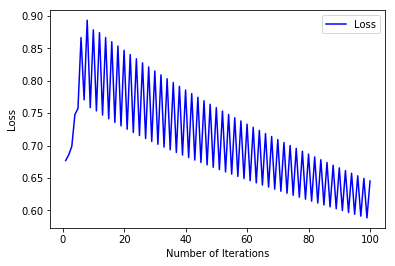

In [13]:
num_iters = 1000
seed = 9
w, b, losses, wts = train(lr = 0.005, iters = num_iters, seeding = True, seed=seed)  # default seed = 9
num_iter = [i for i in range(1, num_iters + 1)]
plt.plot(num_iter[:100], losses[:100], 'b', label = 'Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

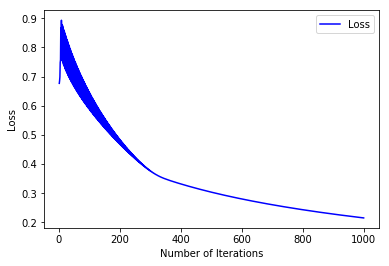

In [14]:
plt.plot(num_iter, losses, 'b', label = 'Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### We see that the loss initially oscillates and then slowly stablizes as it constantly starts decreasing.

### 3. What happens to the model if weights are intialized to zero? Explain your observations.

Loss at iteration 0:	0.6931
Loss at iteration 100:	0.5845
Loss at iteration 200:	0.4669
Loss at iteration 300:	0.3760
Loss at iteration 400:	0.3315
Loss at iteration 500:	0.3033
Loss at iteration 600:	0.2799
Loss at iteration 700:	0.2600
Loss at iteration 800:	0.2429
Loss at iteration 900:	0.2280
Loss at iteration 1000:	0.2148
Loss at iteration 1100:	0.2031
Loss at iteration 1200:	0.1925
Loss at iteration 1300:	0.1830
Loss at iteration 1400:	0.1744
Loss at iteration 1500:	0.1665
Loss at iteration 1600:	0.1593
Loss at iteration 1700:	0.1527
Loss at iteration 1800:	0.1465
Loss at iteration 1900:	0.1409


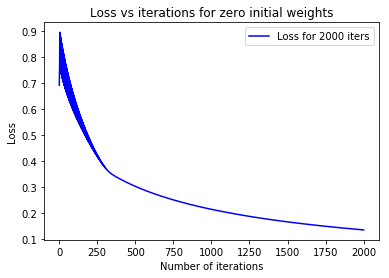

In [15]:
num_iters = 2000
W, b, losses, wts_zeros = train(lr = 0.005, iters = num_iters, init_wts_zeros = True)
# print(np.array(wts_zeros).shape)
# [print(wts_zeros[i][:2]) for i in range(1980,num_iters)]
num_iter = [i for i in range(1, num_iters + 1)]
plt.plot(num_iter, losses, 'b', label = 'Loss for ' + str(num_iters) + ' iters')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss vs iterations for zero initial weights')
plt.legend()
plt.show()

Loss at iteration 0:	0.7756
Loss at iteration 100:	0.5901
Loss at iteration 200:	0.4707
Loss at iteration 300:	0.3796
Loss at iteration 400:	0.3345
Loss at iteration 500:	0.3060
Loss at iteration 600:	0.2824
Loss at iteration 700:	0.2623
Loss at iteration 800:	0.2450
Loss at iteration 900:	0.2299
Loss at iteration 1000:	0.2166
Loss at iteration 1100:	0.2047
Loss at iteration 1200:	0.1941
Loss at iteration 1300:	0.1845
Loss at iteration 1400:	0.1757
Loss at iteration 1500:	0.1678
Loss at iteration 1600:	0.1605
Loss at iteration 1700:	0.1538
Loss at iteration 1800:	0.1476
Loss at iteration 1900:	0.1418


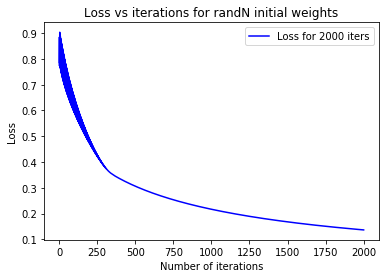

In [16]:
# num_iters = 100
w, b, losses, wts_randn = train(lr = 0.005, iters = num_iters)

num_iter = [i for i in range(1, num_iters + 1)]
plt.plot(num_iter, losses, 'b', label = 'Loss for ' + str(num_iters) + ' iters')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss vs iterations for randN initial weights')

plt.legend()
plt.show()

In [17]:
num_iters = 5000
w, b, losses, wts_zeros = train(lr = 0.005, iters = num_iters, init_wts_zeros = True)
w, b, losses2, wts_randn = train(lr = 0.005, iters = num_iters)

Loss at iteration 0:	0.6931
Loss at iteration 100:	0.5845
Loss at iteration 200:	0.4669
Loss at iteration 300:	0.3760
Loss at iteration 400:	0.3315
Loss at iteration 500:	0.3033
Loss at iteration 600:	0.2799
Loss at iteration 700:	0.2600
Loss at iteration 800:	0.2429
Loss at iteration 900:	0.2280
Loss at iteration 1000:	0.2148
Loss at iteration 1100:	0.2031
Loss at iteration 1200:	0.1925
Loss at iteration 1300:	0.1830
Loss at iteration 1400:	0.1744
Loss at iteration 1500:	0.1665
Loss at iteration 1600:	0.1593
Loss at iteration 1700:	0.1527
Loss at iteration 1800:	0.1465
Loss at iteration 1900:	0.1409
Loss at iteration 2000:	0.1356
Loss at iteration 2100:	0.1307
Loss at iteration 2200:	0.1261
Loss at iteration 2300:	0.1219
Loss at iteration 2400:	0.1179
Loss at iteration 2500:	0.1141
Loss at iteration 2600:	0.1106
Loss at iteration 2700:	0.1072
Loss at iteration 2800:	0.1041
Loss at iteration 2900:	0.1011
Loss at iteration 3000:	0.0983
Loss at iteration 3100:	0.0956
Loss at iteration 32

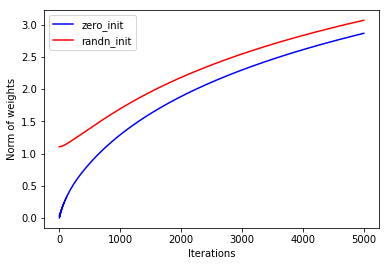

In [18]:
# print(np.shape(wts_zeros))
wts_zeros_mag = []
wts_randn_mag = []
[wts_zeros_mag.append(np.linalg.norm(wts_zeros[i])) for i in range(len(wts_zeros))]
[wts_randn_mag.append(np.linalg.norm(wts_randn[i])) for i in range(len(wts_randn))]
# print(wts_zeros_mag)
# print(wts_randn_mag)
num_iter = [i for i in range(1, num_iters+1)]
plt.plot(num_iter, wts_zeros_mag, 'b', label='zero_init')
plt.plot(num_iter, wts_randn_mag, 'r', label='randn_init')
plt.xlabel('Iterations')
plt.ylabel('Norm of weights')
plt.legend()
plt.show()

#### The graph for loss over the iterations with zero initial weights is similar to that with small random normal initial weights. Logistic regression model is basically a single neuron. So, there is no issue with learning. 
#### But if the weights are initialized to zeros, in the first iteration's forward pass $z$ will be independent of input. 
#### Also, we see from the above plots that if we start with zero initialization, we can say that weights are generally smaller.

### 4. What is the range of probabilities for cat images in the test data? What is the range of probabilities for cat images in the train data? How do they compare?

In [19]:
w, b, losses, wts = train(lr = 0.0025, iters = 5000)  # Default seed = 9

Loss at iteration 0:	0.6788
Loss at iteration 100:	0.5494
Loss at iteration 200:	0.4943
Loss at iteration 300:	0.4545
Loss at iteration 400:	0.4229
Loss at iteration 500:	0.3966
Loss at iteration 600:	0.3742
Loss at iteration 700:	0.3546
Loss at iteration 800:	0.3373
Loss at iteration 900:	0.3218
Loss at iteration 1000:	0.3079
Loss at iteration 1100:	0.2952
Loss at iteration 1200:	0.2837
Loss at iteration 1300:	0.2730
Loss at iteration 1400:	0.2632
Loss at iteration 1500:	0.2541
Loss at iteration 1600:	0.2457
Loss at iteration 1700:	0.2378
Loss at iteration 1800:	0.2304
Loss at iteration 1900:	0.2234
Loss at iteration 2000:	0.2169
Loss at iteration 2100:	0.2107
Loss at iteration 2200:	0.2049
Loss at iteration 2300:	0.1994
Loss at iteration 2400:	0.1942
Loss at iteration 2500:	0.1892
Loss at iteration 2600:	0.1845
Loss at iteration 2700:	0.1800
Loss at iteration 2800:	0.1757
Loss at iteration 2900:	0.1716
Loss at iteration 3000:	0.1677
Loss at iteration 3100:	0.1640
Loss at iteration 32

In [20]:
x, y = load_train_data()
x_train = []
train_prob_cat = []
for i in range(len(y)):
    if  y[i] == 1:
        x_train.append(x[i])
x_train = np.array(x_train)
x_train = flatten(x_train)
x_train = x_train/255. # normalize the data to [0, 1]
train_pred, _ = forward(x_train, w, b)
print("range of probablities for cats in train: ", min(train_pred[0]), ", ", max(train_pred[0]))

x, y = load_test_data()
x_test = []
test_prob_cat = []
for i in range(len(y)):
    if  y[i] == 1:
        x_test.append(x[i])
x_test = np.array(x_test)
x_test = flatten(x_test)
x_test = x_test/255. # normalize the data to [0, 1]
test_pred, _ = forward(x_test, w, b)
print("range of probablities for cats in test: ", min(test_pred[0]), ", ", max(test_pred[0]))

range of probablities for cats in train:  0.525126276605 ,  0.977260444535
range of probablities for cats in test:  0.0248126971148 ,  0.987403343016


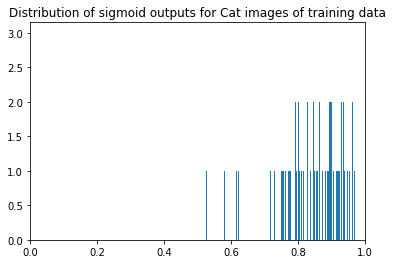

In [21]:
plt.xlim(left = 0)
plt.hist(train_pred[0], bins = 200, label = 'train')
# seaborn.distplot(train_prob_cat)
plt.title('Distribution of sigmoid outputs for Cat images of training data')
plt.show()


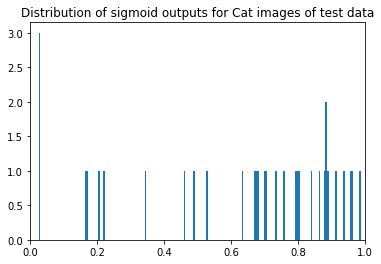

In [22]:
plt.xlim(left = 0)
plt.hist(test_pred[0], bins = 200)
# seaborn.distplot(test_prob_cat)
plt.title('Distribution of sigmoid outputs for Cat images of test data')
plt.show()


#### We see that the range of outputs for cat images of train data is above 0.5 while there are many outputs below 0.5 for cat images of the test data.

Note: All questions will be answered in the jupyter notebook only. Wherever code is required you write and run the code in a code cell. For text, write and render in a markdown cell.